In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

# # # use "python -m pip install pymdna" to install pymdna
# import pymdna as mdna

import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

(13, 3) (14, 3)


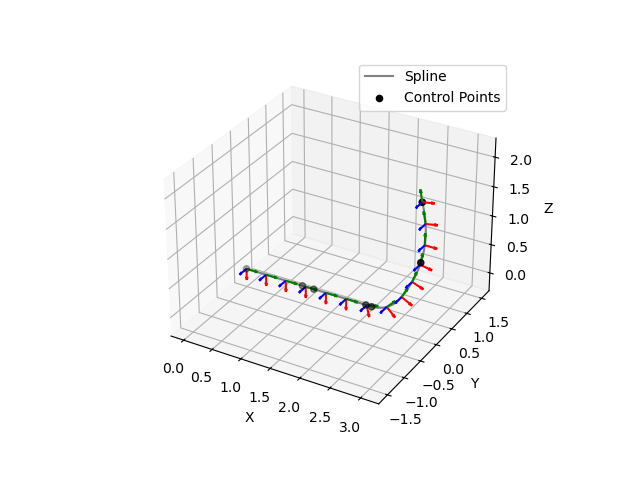

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

In [2]:
%matplotlib ipympl
points = np.array([[0,0,0],[1,0,0],[1.2,0,0],[2.1,0,0],[2.2,0,0],[3,0,1],[3,0,2]])*1
#points = np.array([[0, 0, 0], [1, 1, 1], [2, -1, 2], [3, 0, 1], [4, 2, 1]])*2
spline = mdna.SplineFrames(control_points=points,degree=2,closed=False)

# spline.twist_frames( )
spline.plot_frames(equal=True,spline=True,control_points=True)

In [3]:
spline.frames.shape

(14, 4, 3)

/Users/thor/surfdrive/Projects/pymdna/pymdna/utils.py:54: RuntimeWarning: invalid value encountered in divide
  omega_normalized = np.where(omega_norm != 0, omega / omega_norm, omega)


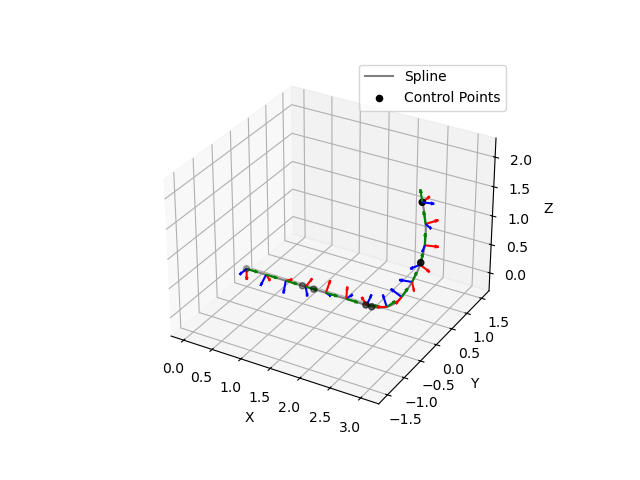

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>)

In [4]:
spline.twist_frames( )
spline.plot_frames(equal=True,spline=True,control_points=True)


(15, 3) (1001, 2)


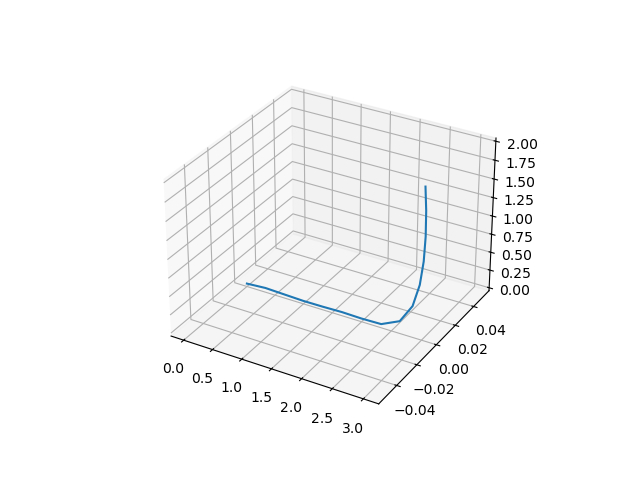

In [7]:
tangents = spline.der1.T
points = spline.positions

print(points.shape, tangents.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(points[:,0],points[:,1],points[:,2],label='spline')
#ax.quiver(points[:,0],points[:,1],points[:,2],tangents[:,0],tangents[:,1],tangents[:,2],label='tangent')

(-0.2052987552252974,
 4.311273859731252,
 -1.755893394255286,
 2.760679220701264,
 -0.1942012219328184,
 3.193228239284594)

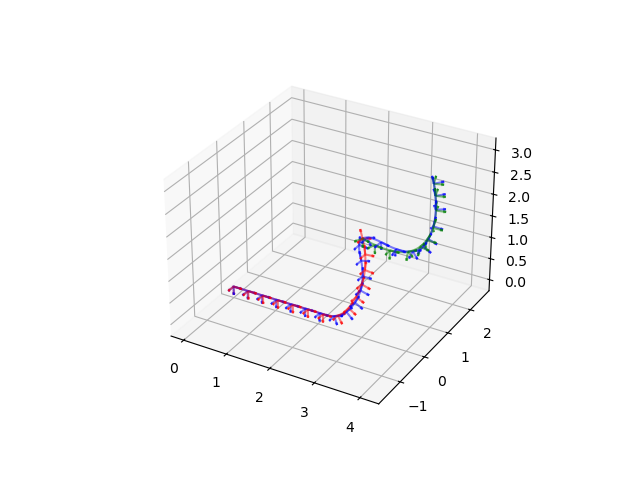

In [3]:
from scipy.interpolate import splev

points = np.array([[0,0,0],[1,0,0],[1.2,0,0],[2.1,0,0],[2.2,0,0],[3,0,1],[3,0,2]])
spline1 = mdna.SplineFrames(control_points=points,degree=2,closed=False)

points2 = np.array([[3,0,2],[4,0,2],[4,1,2],[4,1,3]])
spline2 = mdna.SplineFrames(control_points=points2,degree=2)

points3 = np.array([[0,0,0],[1,0,0],[1.2,0,0],[2.1,0,0],[2.2,0,0],[3,0,1],[3,0,2],[4,0,2],[4,1,2],[4,1,3]])
spline3 = mdna.SplineFrames(control_points=points3,degree=2)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

splines = [spline1,spline2, spline3]
colors = ['r', 'g', 'b']
i = 0
for spline in splines:

    for frame in spline.frames:
        position, right, up, forward = frame
        ax.quiver(*position, *forward, length=0.2, color=colors[i],alpha=0.5)
        ax.quiver(*position, *right, length=0.2, color=colors[i],alpha=0.5)
        ax.quiver(*position, *up, length=0.2, color=colors[i],alpha=0.5)

    _ = spline.tck[0]  # Spline parameters for plotting
    u = np.linspace(0, 1, 100)
    spline_points = np.array(splev(u, spline.tck)).T
    ax.plot(*spline_points.T, color=colors[i], label='Spline',alpha=0.5)
    i += 1

ax.axis('equal')

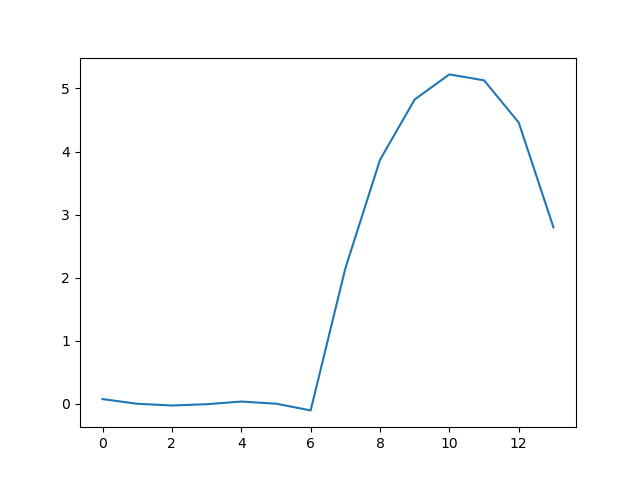

In [8]:
fig,ax = plt.subplots()
ax.plot(spline.derivatives.T[2])